In [137]:
import pandas as pd

In [138]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import time

In [139]:

img_width, img_height = 130, 130 

train_data_dir = 'D:\\chest_xray\\train'
test_data_dir =  'D:\\chest_xray\\test'


validation_data_dir = 'D:\\chest_xray\\val'

nb_validation_samples = 800

batch_size = 16            

epochs = 5               


test_batch_size = 25   

input_shape = (img_width, img_height, 3)

In [140]:
model = Sequential()

In [141]:
model.add(Input(shape = input_shape ))

In [142]:
model.add(Conv2D(
filters=64,              
kernel_size=(3, 3),
strides = (2,2),
padding='same',
activation='relu'           ))

In [143]:
model.add(MaxPool2D())
model.add(Conv2D(
filters=32,
kernel_size=(3, 3),
activation='relu'))

In [144]:
model.add(Flatten())

In [145]:
model.add(Dense(200,activation = 'relu'))

In [146]:
model.add(Dropout(rate=0.3))

In [147]:
model.add(Dense(100, activation='relu'))

In [148]:
model.add(Dropout(rate=0.25))

In [149]:
model.add(Dense(1, activation='sigmoid'))

In [150]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 65, 65, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        18464     
                                                                 
 flatten_5 (Flatten)         (None, 28800)             0         
                                                                 
 dense_15 (Dense)            (None, 200)               5760200   
                                                                 
 dropout_14 (Dropout)        (None, 200)               0         
                                                      

In [151]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 65, 65, 64)        1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        18464     
                                                                 
 flatten_5 (Flatten)         (None, 28800)             0         
                                                                 
 dense_15 (Dense)            (None, 200)               5760200   
                                                                 
 dropout_14 (Dropout)        (None, 200)               0         
                                                      

In [152]:
model.compile(
 loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [153]:
tr_dtgen = ImageDataGenerator(

                              rescale=1. / 255, 
                              shear_range=0.3,     
                              zoom_range=0.25,
                              horizontal_flip=True,
                              )

In [154]:
train_generator = tr_dtgen.flow_from_directory(
                                               train_data_dir, 
                                               target_size=(img_width, img_height), 
                                               batch_size=batch_size,
                                               class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [155]:
val_dtgen = ImageDataGenerator(rescale=1. / 255)

In [156]:
validation_generator = val_dtgen.flow_from_directory(
                                                     validation_data_dir,
                                                     target_size=(img_width, img_height),
                                                     batch_size=batch_size,
                                                     class_mode='binary'
                                                     )

Found 16 images belonging to 2 classes.


In [157]:
start = time.time()
history = model.fit_generator(
                              generator = train_generator,
                              epochs=1,
                              validation_data=validation_generator,
                              verbose = 1
                                                          )

end = time.time()
(end - start)/60  

C:\Users\ubuntu\AppData\Local\Temp\ipykernel_30212\1505334435.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


326/326 [==============================] - 67s 201ms/step - loss: 0.4726 - accuracy: 0.7885 - val_loss: 1.0278 - val_accuracy: 0.6250


1.1128743330637614

In [158]:
result = model.evaluate(
                        validation_generator,
                        verbose = 1,
                        steps = 4
                        )

4/4 [==============================] - 0s 3ms/step - loss: 1.0278 - accuracy: 0.6250


In [159]:
result

[1.0278167724609375, 0.625]

In [160]:
pred = model.predict(validation_generator, steps = 2)

pred[:5]


2/2 [==============================] - 0s 20ms/step


array([[0.90904695],
       [0.9358879 ],
       [0.84084755],
       [0.979658  ],
       [0.9985276 ]], dtype=float32)

In [161]:
test_dtgen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_dtgen.flow_from_directory(
                                                test_data_dir,
                                            
                                                target_size=(img_width, img_height),
                                             
                                                batch_size=batch_size,
                                              
                                                class_mode='binary'
                                                )

Found 624 images belonging to 2 classes.


In [162]:
im = test_generator
images = next(im)     
images[0].shape

(16, 130, 130, 3)

1/1 [==============================] - 0s 69ms/step


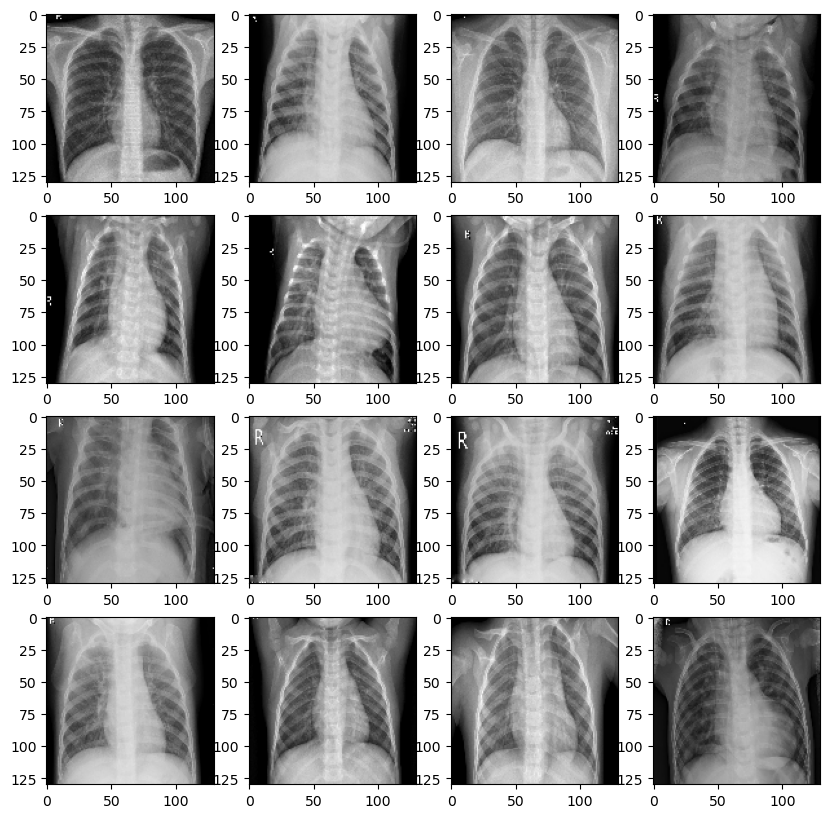

[[0.35035068]
 [0.95296514]
 [0.6732215 ]
 [0.6436651 ]
 [0.7656002 ]
 [0.93997353]
 [0.92114115]
 [0.969517  ]
 [0.9820601 ]
 [0.9734351 ]
 [0.998495  ]
 [0.7698617 ]
 [0.9093955 ]
 [0.45221987]
 [0.88688576]
 [0.959472  ]]


In [163]:
results = model.predict(images[0])

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.figure(figsize= (10,10))
for i in range(results.shape[0]):
    plt.subplot(4,4,i+1)
    _=imshow(images[0][i]) ;

plt.show() ;

print(results)